# **Primary Data Set: Prediction System**

# STEP 1 - DATA COLLECTION

In [0]:
#libraries
import numpy as np
import pandas as pd
import io
import seaborn as sns
from matplotlib import mlab
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_absolute_error

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
data=pd.read_csv('gdrive/My Drive/dspproject/books.csv')
#view data
data.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964


In [0]:
#No of rows , No of columns 
print("No of rows , No of columns :",data.shape)

No of rows , No of columns : (3500, 10)


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              3500 non-null   int64  
 1   title               3500 non-null   object 
 2   authors             3500 non-null   object 
 3   average_rating      3500 non-null   float64
 4   isbn                3500 non-null   object 
 5   isbn13              3500 non-null   int64  
 6   language_code       3500 non-null   object 
 7   # num_pages         3500 non-null   int64  
 8   ratings_count       3500 non-null   int64  
 9   text_reviews_count  3500 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 273.6+ KB


In [0]:
data.describe()

,bookID,average_rating,isbn13,# num_pages,ratings_count,text_reviews_count
count,3500.000000,3500.000000,3.500000e+03,3500.000000,3.500000e+03,3500.000000
mean,5291.483429,3.940549,9.762017e+12,347.397143,3.415949e+04,918.740571
std,3169.548935,0.326962,4.223434e+11,249.606846,1.784897e+05,3445.968337
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,2548.500000,3.770000,9.780317e+12,198.000000,1.110000e+02,10.000000
50%,5179.500000,3.960000,9.780522e+12,301.000000,9.455000e+02,66.000000
75%,7911.750000,4.130000,9.780822e+12,432.000000,7.807500e+03,369.500000
max,10853.000000,5.000000,9.789991e+12,3342.000000,5.629932e+06,70390.000000


In [0]:
data.isnull()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
3495,False,False,False,False,False,False,False,False,False,False
3496,False,False,False,False,False,False,False,False,False,False
3497,False,False,False,False,False,False,False,False,False,False
3498,False,False,False,False,False,False,False,False,False,False


In [0]:
data.isnull().any()

bookID                False
title                 False
authors               False
average_rating        False
isbn                  False
isbn13                False
language_code         False
# num_pages           False
ratings_count         False
text_reviews_count    False
dtype: bool

# STEP 2 - DATA PREPROCESSING


In [0]:
#rename column name
data=data.rename(columns={"# num_pages": "num_pages"})

In [0]:
data.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964


# STEP 3 - EXPLORATORY DATA ANALYSIS


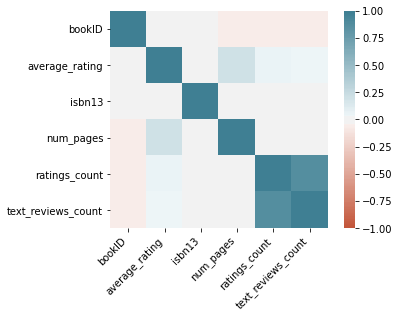

In [0]:
#correlation 
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Text(0.5, 0.98, ' Correlations Heat Map for attributes')

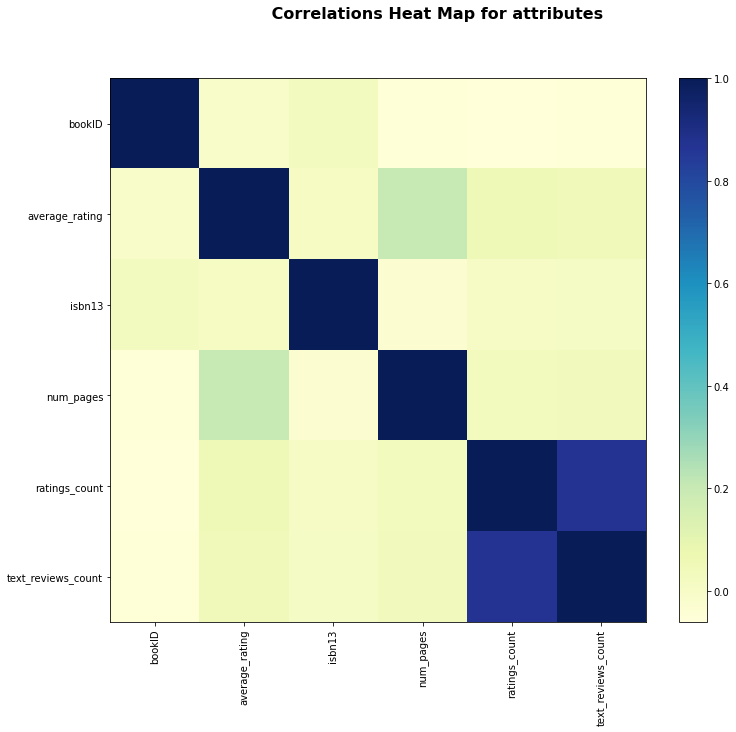

In [0]:
#correlation 
corltn=data.corr()
corltn=corltn.fillna(0)
plt.figure(figsize=(12, 10))
plt.imshow(corltn, cmap='YlGnBu', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corltn)), corltn.columns, rotation='vertical')
plt.yticks(range(len(corltn)), corltn.columns);
plt.suptitle(' Correlations Heat Map for attributes', fontsize=16, fontweight='bold')

 Range of average_rating :  $ 0.0  -  $ 5.0


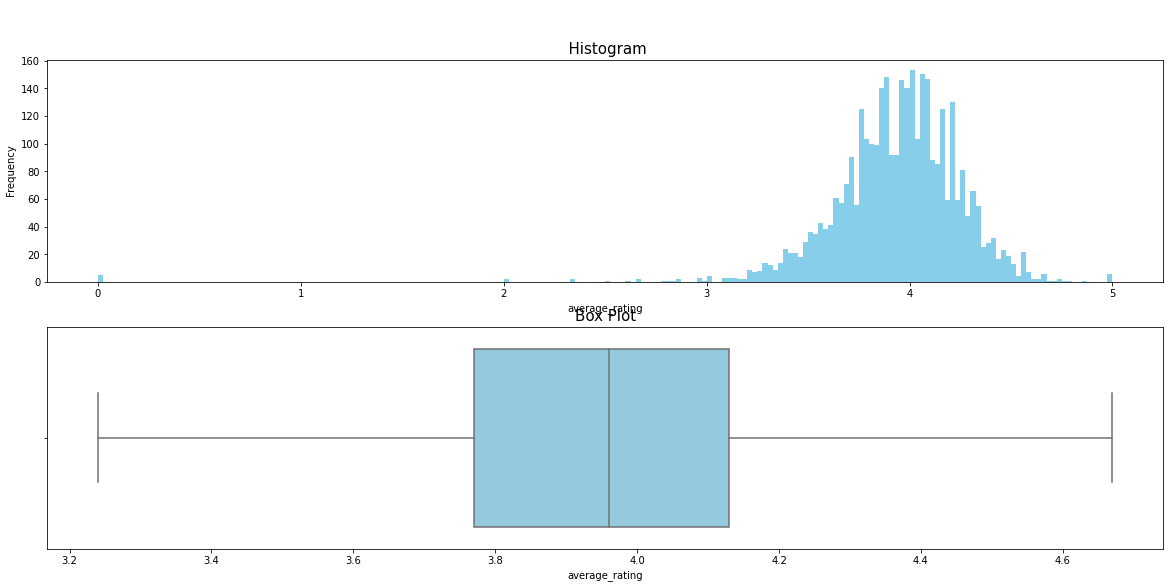

In [0]:
# average_rating column data analysis
print(" Range of average_rating : ",'$',data["average_rating"].min(), ' - ','$',data["average_rating"].max())
fig, ax = plt.subplots(2, 1, figsize = (20, 9))
ax[0].hist(data.average_rating, bins = 200, range = [min(data.average_rating), max(data.average_rating)], label = "average_rating",color = "skyblue")
ax[0].set_title("\n \n  Histogram ", fontsize = 15)
ax[0].set_xlabel("average_rating", fontsize = 10)
ax[0].set_ylabel(" Frequency ", fontsize = 10)
sns.boxplot(data.average_rating, showfliers = False, ax = ax[1],color = "skyblue")

ax[1].set_title("Box Plot", fontsize = 15)
plt.show()

Note: Major concentration of average rating is around 3.8 to 4.1



 Range of ratings_count :  $ 0  -  $ 70390


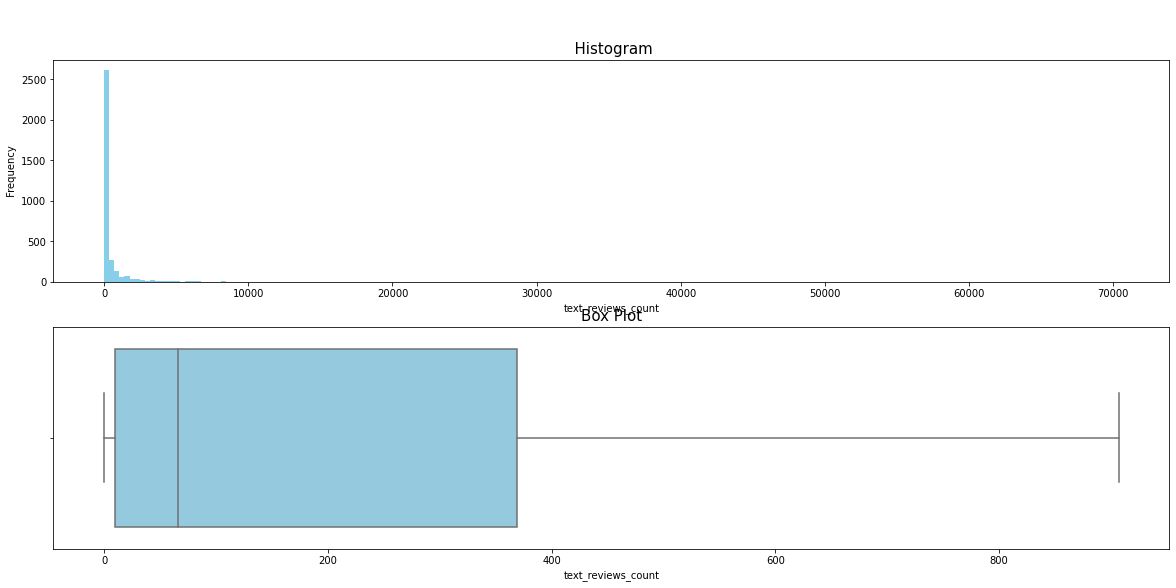

In [0]:
# ratings_count coulmn data analysis
print(" Range of ratings_count : ",'$',data["text_reviews_count"].min(), ' - ','$',data["text_reviews_count"].max())
fig, ax = plt.subplots(2, 1, figsize = (20, 9))
ax[0].hist(data.text_reviews_count, bins = 200, range = [min(data.text_reviews_count), max(data.text_reviews_count)], label = "text_reviews_count",color = "skyblue")
ax[0].set_title("\n \n  Histogram ", fontsize = 15)
ax[0].set_xlabel("text_reviews_count", fontsize = 10)
ax[0].set_ylabel(" Frequency ", fontsize = 10)
sns.boxplot(data.text_reviews_count, showfliers = False, ax = ax[1],color = "skyblue")
ax[1].set_title("Box Plot", fontsize = 15)
plt.show()

Note: Text review count is distributed untill 210

In [0]:
data.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964


In [0]:
#view all columns
print("data",data.columns)
print("\n data.title.unique()",data.title.unique())
print("\n data['title'].size",data['title'].size)
print("\n data['title'].count()",data['title'].count())
print("\n data['title'].nunique()",data['title'].nunique())
print("\n data.authors.unique()",data.authors.unique())
print("\n data['authors'].size",data['authors'].size)
print("\n data['authors'].nunique()",data['authors'].nunique())
print("\n data['average_rating'].nunique()",data['average_rating'].nunique())
print("\n data['language_code'].nunique()",data['language_code'].nunique())

data Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count'],
      dtype='object')

 data.title.unique() ['Harry Potter and the Half-Blood Prince (Harry Potter  #6)'
 'Harry Potter and the Order of the Phoenix (Harry Potter  #5)'
 "Harry Potter and the Sorcerer's Stone (Harry Potter  #1)" ...
 "Gatsby's Girl" 'Into Thin Air: Personal Account of the Everest Disaster'
 "In Search of Captain Zero: A Surfer's Road Trip Beyond the End of the Road"]

 data['title'].size 3500

 data['title'].count() 3500

 data['title'].nunique() 3147

 data.authors.unique() ['J.K. Rowling-Mary GrandPré' 'J.K. Rowling' 'W. Frederick Zimmerman' ...
 'Jon Lee Anderson' 'Caroline Preston' 'Allan C. Weisbecker']

 data['authors'].size 3500

 data['authors'].nunique() 2166

 data['average_rating'].nunique() 173

 data['language_code'].nunique() 20


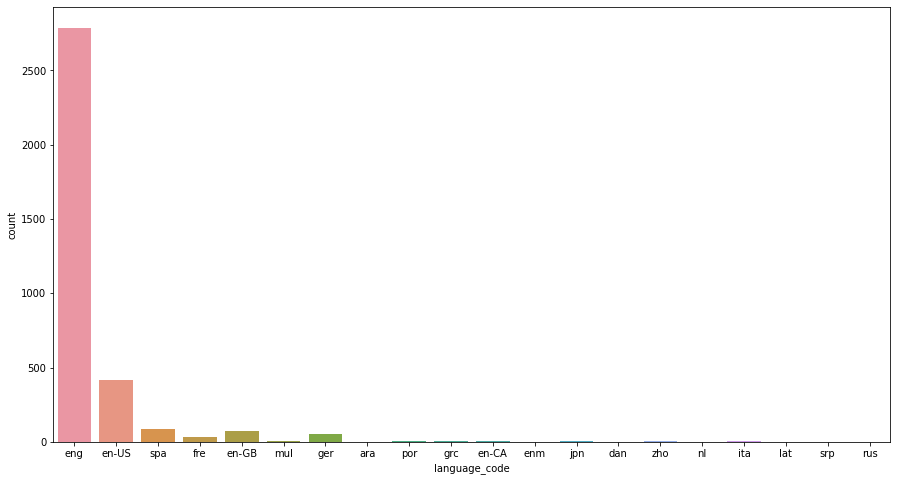

In [0]:
# language_code column data analysis
plt.figure(figsize=(15,8))
p = sns.countplot(data=data, x = 'language_code')

Note: Majority in english



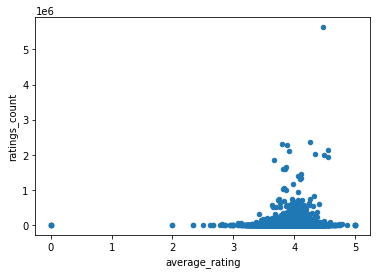

In [0]:
# average_rating and ratings_count relation
ax2 = data.plot.scatter(x='average_rating', y='ratings_count')

Note: Focused on average rating around 4 to rating count below 2000000

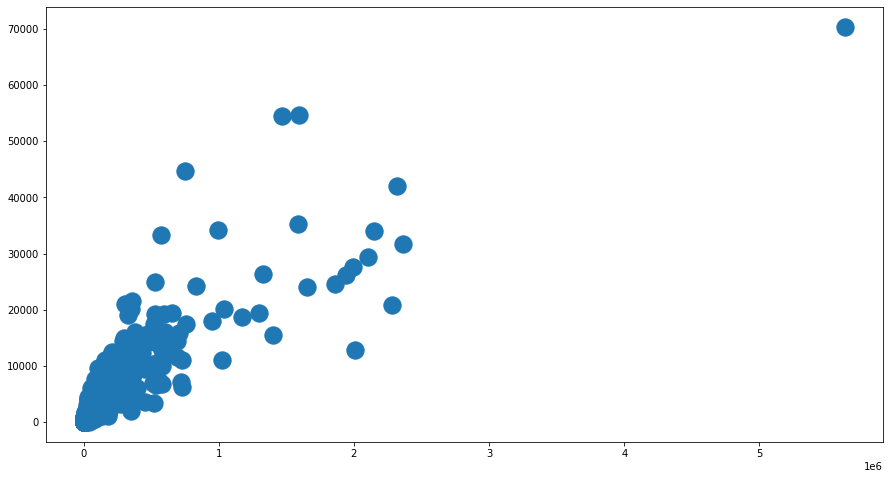

In [0]:
#ratings_count and text_reviews_count relation
plt.figure(figsize=(15,8))
plt.scatter(data.ratings_count, data.text_reviews_count, s=300)

Note: average rating is distributed over below 100000 rating count and 20000 text review count



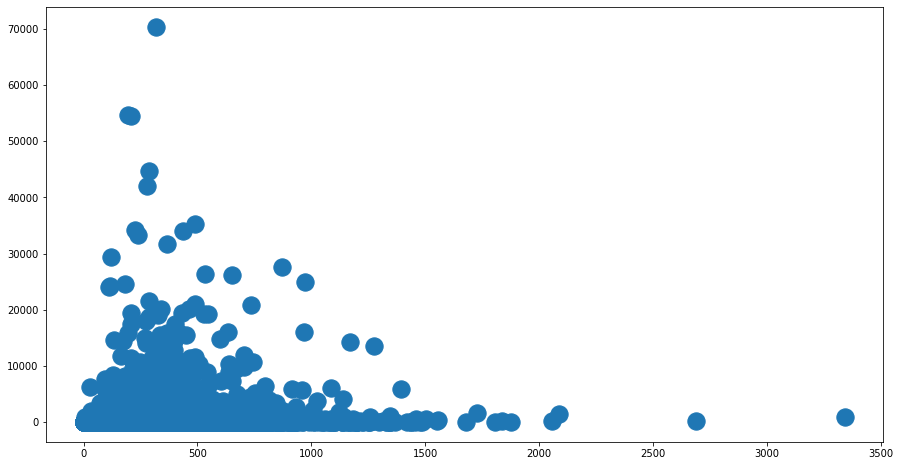

In [0]:
#num_pages and text_reviews_count relation
plt.figure(figsize=(15,8))
plt.scatter(data.num_pages, data.text_reviews_count, s=300)

Note: average rating is around 500 num of pages and 20000 text review count



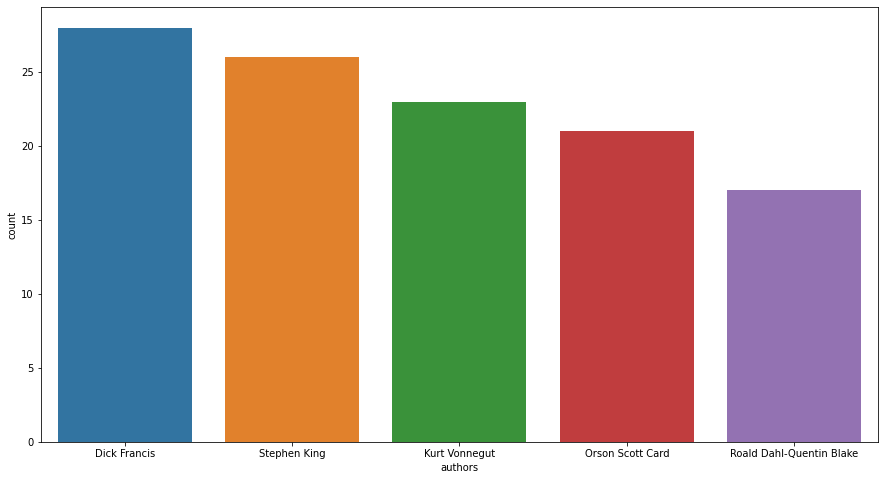

In [0]:
#top 5 authors
plt.figure(figsize=(15,8))
ax=sns.countplot(x = "authors", order=data['authors'].value_counts().index[0:5] ,data=data)

Unique authors : 2166


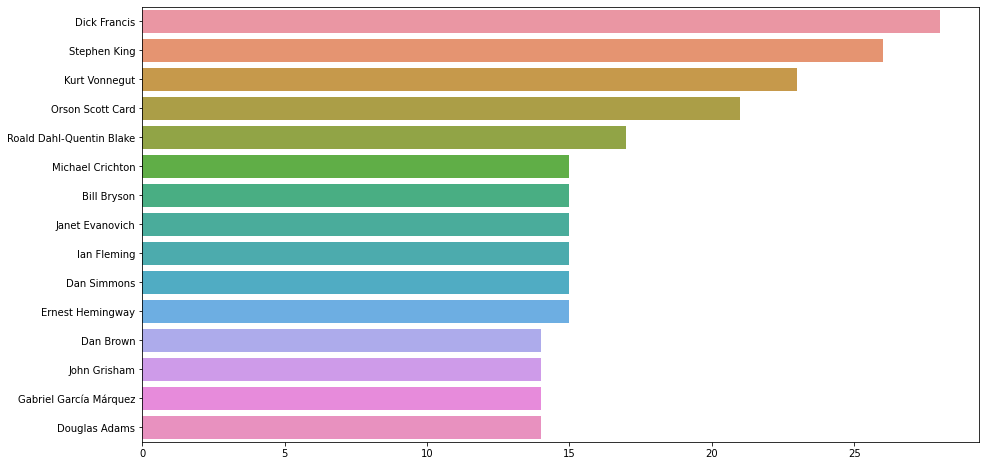

In [0]:
#top 15 authors
plt.figure(figsize=(15,8))
authors = data["authors"].value_counts()
print("Unique authors :", authors.size)
ax=sns.barplot(authors[0:15].values, authors[0:15].index)

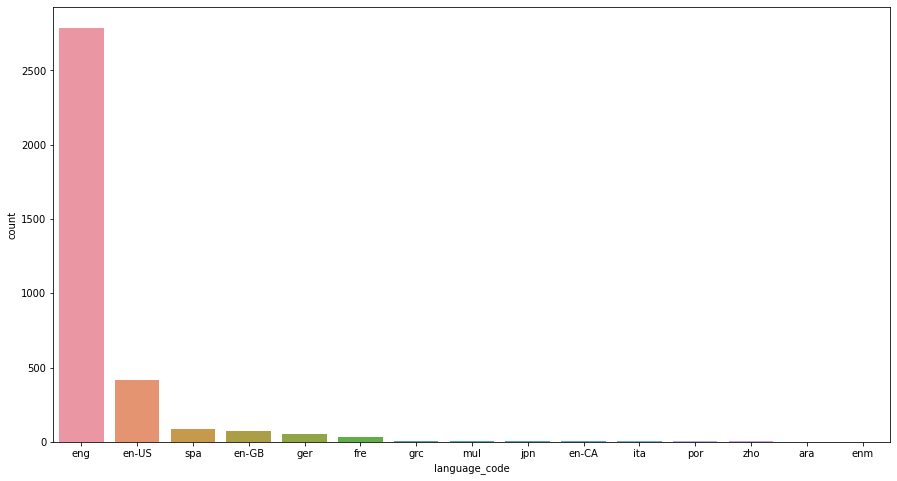

In [0]:
#top unique language code  
plt.figure(figsize=(15,8))
ax=sns.countplot(x = "language_code", order=data['language_code'].value_counts().index[0:15] ,data=data)

Unique language_code : 20


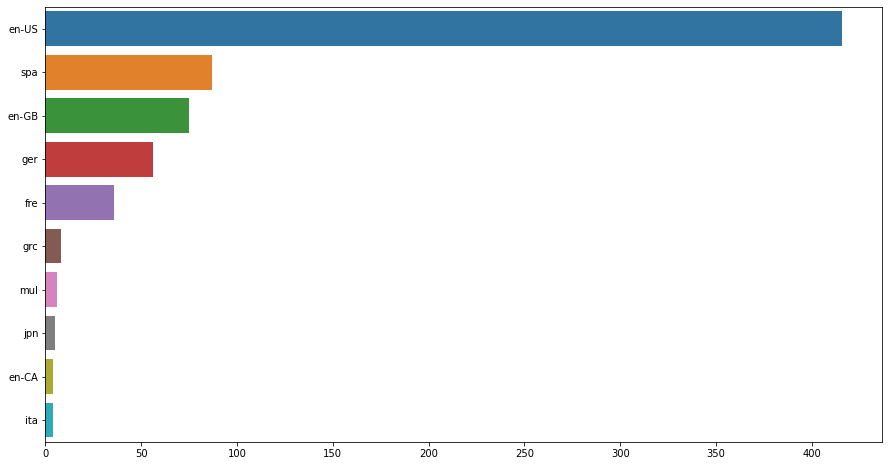

In [0]:
#top unique language code  
plt.figure(figsize=(15,8))
language_code = data["language_code"].value_counts()
print("Unique language_code :", language_code.size)
ax=sns.barplot(language_code[1:11].values, language_code[1:11].index)

Note: en-US is dominant

Unique title : 3147


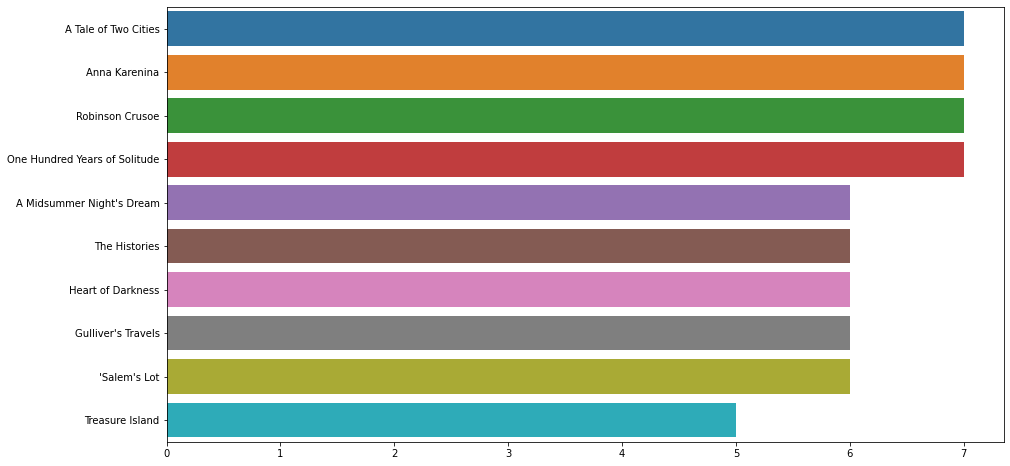

In [0]:
#top unique title
plt.figure(figsize=(15,8))
title = data["title"].value_counts()
print("Unique title :", title.size)
ax= sns.barplot(title[1:11].values, title[1:11].index)

Unique ratings_count : 3147


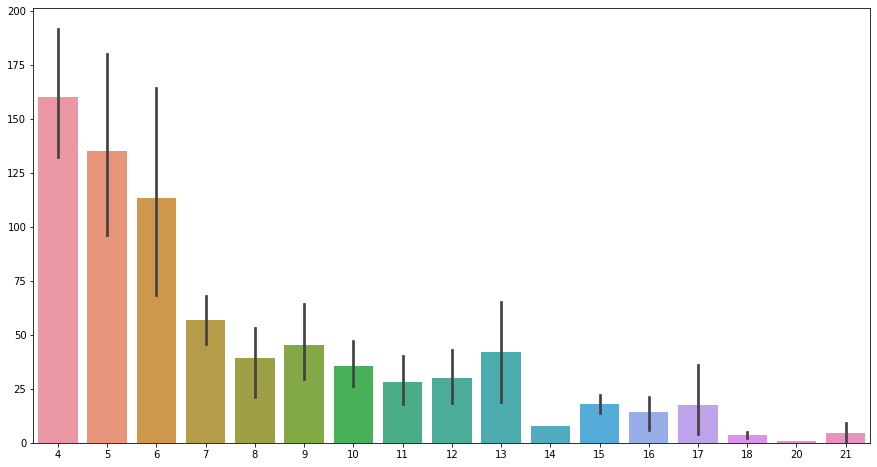

In [0]:
#top unique ratings_count
plt.figure(figsize=(15,8))
ratings_count = data["ratings_count"].value_counts()
print("Unique ratings_count :", title.size)
ax=sns.barplot(ratings_count[1:111].values, ratings_count[1:111].index)

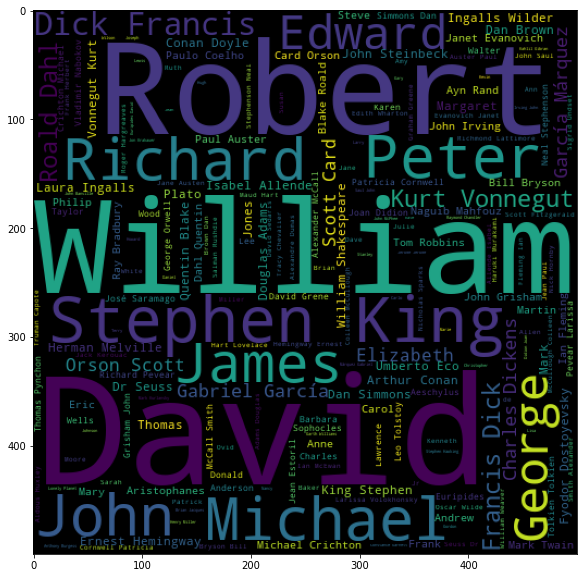

In [0]:
#analysis: size of each word indicates its frequency
wordcloud = WordCloud(width = 500, height = 500).generate(" ".join(data.authors.astype(str)))
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.show()

Note: William and David is most frequently repeated.



In [0]:
data.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964


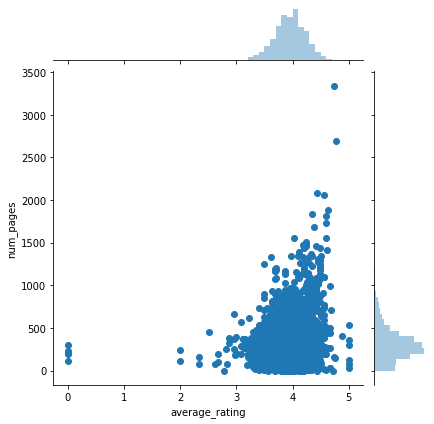

In [0]:
fig=sns.jointplot(x = 'average_rating', y = 'num_pages', data = data, kind='scatter')

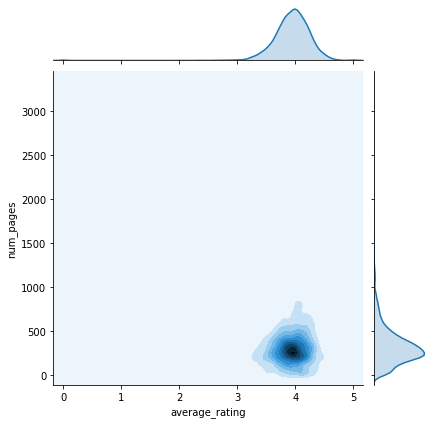

In [0]:
fig=sns.jointplot(x = 'average_rating', y = 'num_pages', data = data, kind='kde')

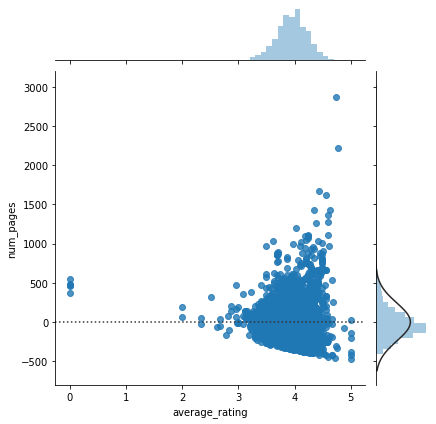

In [0]:
fig=sns.jointplot(x = 'average_rating', y = 'num_pages', data = data,kind='resid')

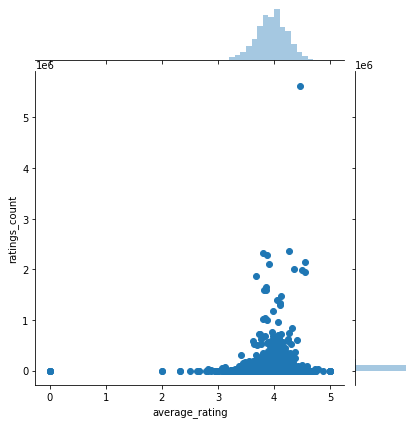

In [0]:
fig=sns.jointplot(x = 'average_rating', y = 'ratings_count', data = data, kind='scatter')

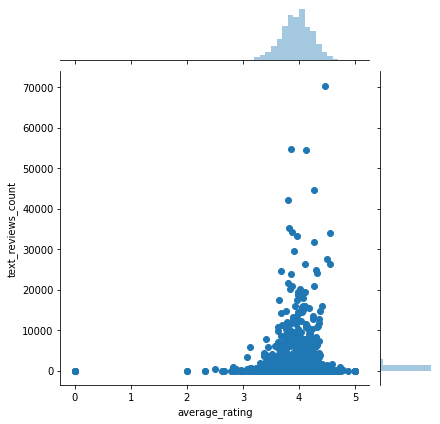

In [0]:
fig=sns.jointplot(x = 'average_rating', y = 'text_reviews_count', data = data, kind='scatter')

In [0]:
X= data['average_rating']

# STEP 4 - DATA MODELLING


In [0]:
data.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964


In [0]:
data.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count'],
      dtype='object')

In [0]:
X=data[['bookID', 'title', 'authors', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count']]

In [0]:
X.head()

,bookID,title,authors,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,0439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,0439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,043965548X,9780439655484,eng,435,2149872,33964


In [0]:
y=data['average_rating']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

In [0]:
X=X.drop(['language_code'],axis=1)

In [0]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   bookID              3500 non-null   int64 
 1   title               3500 non-null   object
 2   authors             3500 non-null   object
 3   isbn                3500 non-null   object
 4   isbn13              3500 non-null   int64 
 5   num_pages           3500 non-null   int64 
 6   ratings_count       3500 non-null   int64 
 7   text_reviews_count  3500 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 218.9+ KB


In [0]:
le = preprocessing.LabelEncoder()
X['title'] = le.fit_transform(X['title'])

In [0]:
X['authors'] = le.fit_transform(X['authors'])

In [0]:
X.head()

,bookID,title,authors,isbn,isbn13,num_pages,ratings_count,text_reviews_count
0,1,1022,879,0439785960,9780439785969,652,1944099,26249
1,2,1023,879,0439358078,9780439358071,870,1996446,27613
2,3,1025,879,0439554934,9780439554930,320,5629932,70390
3,4,1021,876,0439554896,9780439554893,352,6267,272
4,5,1024,879,043965548X,9780439655484,435,2149872,33964


# Model 1 : Linear Regression


In [0]:
X=X.drop(['isbn'],axis=1)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

In [0]:
regr = linear_model.LinearRegression()
y_train = y_train[:, np.newaxis]
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2800, 7)
(2800, 1)
(700, 7)
(700,)


# STEP 5 - MODEL EVALUATION


Mean Square Error:

Measures average squared error of our predictions.
For each point, it calculates square difference between the predictions and the target and then average those values.
Root Mean Square Error:

RMSE is just the square root of MSE.
It make scale of the errors to be the same as the scale of targets.
Mean Absolute Error:

Average of absolute differences between the target values and the predictions.
Linear score which means that all the individual differences are weighted equally in the average.

In [65]:
y_predict = regr.predict(X_test)
print("Mean squared error: ",mean_squared_error(y_test,y_predict))

Mean squared error:  0.1263480632366212


In [66]:
print("Root mean square error: ",np.sqrt(mean_squared_error(y_test,y_predict)))

Root mean square error:  0.35545472740789535


In [67]:
print("Mean absolute error: ",mean_absolute_error(y_test, y_predict))

Mean absolute error:  0.2313850442666012


In [68]:
X.head()

,bookID,title,authors,isbn13,num_pages,ratings_count,text_reviews_count
0,1,1022,879,9780439785969,652,1944099,26249
1,2,1023,879,9780439358071,870,1996446,27613
2,3,1025,879,9780439554930,320,5629932,70390
3,4,1021,876,9780439554893,352,6267,272
4,5,1024,879,9780439655484,435,2149872,33964


Linear regression with different features



In [0]:
X1=X.drop(['isbn13'],axis=1)

In [0]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size = 0.20, random_state = 10)

In [71]:
regr = linear_model.LinearRegression()
y_train1 = y_train1[:, np.newaxis]
regr.fit(X_train1, y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Metrics evaluation



In [72]:
y_predict1 = regr.predict(X_test1)
print("Mean squared error",mean_squared_error(y_test1,y_predict1))

Mean squared error 0.12638245557945246


In [73]:
print("Root mean square error: ",np.sqrt(mean_squared_error(y_test,y_predict)))

Root mean square error:  0.35545472740789535


In [74]:
print("Mean absolute error",mean_absolute_error(y_test1, y_predict1))

Mean absolute error 0.23136498755980062


# Model 2 : Random Forest


Random Forest Regressor:

Meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset.
Averaging to improve the predictive accuracy and control over-fitting.

In [75]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=150,n_jobs=-1,min_samples_leaf=5, max_features=0.5)
model.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
predict_test= model.predict(X_test)

In [77]:
print('Accuracy score of Random Forest model',model.score(X_test,y_test))

Accuracy score of Random Forest model 0.19573036237834718
